In [1]:
import json 
import string 
from bs4 import BeautifulSoup

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# plot accuracy and loss
def plot_results(training_results):
  plt.plot(training_results.history['accuracy'])
  plt.plot(training_results.history['val_accuracy'])

  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')

  plt.legend(['train', 'val'], loc='upper left')

  plt.show()

  plt.plot(training_results.history['loss'])
  plt.plot(training_results.history['val_loss'])

  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')

  plt.legend(['train', 'val'], loc='upper left')

  plt.show()

In [6]:
with open("../data/Sarcasm_Headlines_Dataset_v2.json", 'r') as file_:
  datastore = json.load(file_)['items']

table = str.maketrans('', '', string.punctuation)

stopwords = []
with open("../data/stop.txt", 'r') as file_:
  stopwords = file_.read().splitlines()

sentences = []
labels = []
urls = []

for item in datastore:
  sentence = item['headline'].lower()
  sentence = sentence.replace(",", " , ")
  sentence = sentence.replace(".", " . ")
  sentence = sentence.replace("-", " - ")
  sentence = sentence.replace("/", " / ")

  soup = BeautifulSoup(sentence)
  sentence = soup.get_text()
  words = sentence.split()
  filtered_sentence = ""
  for word in words:
    word = word.translate(table)
    if word not in stopwords:
      filtered_sentence = filtered_sentence + word + " "
  sentences.append(filtered_sentence)
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [7]:
training_size = 23000

training_sentences = sentences[0:training_size]
validation_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
validation_labels = labels[training_size:]

In [8]:
vocab_size = 20000
max_length = 10
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
validation_padded = np.array(validation_padded)
validation_labels = np.array(validation_labels)

In [12]:
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [14]:
training_results = model.fit(training_padded, training_labels, epochs=30, validation_data = (validation_padded, validation_labels))

Epoch 1/30
719/719 [==============================] - 15s 16ms/step - loss: 0.6906 - accuracy: 0.5287 - val_loss: 0.6878 - val_accuracy: 0.5408
Epoch 2/30
719/719 [==============================] - 11s 15ms/step - loss: 0.6857 - accuracy: 0.5505 - val_loss: 0.6825 - val_accuracy: 0.5797
Epoch 3/30
719/719 [==============================] - 11s 16ms/step - loss: 0.6797 - accuracy: 0.5958 - val_loss: 0.6756 - val_accuracy: 0.6141
Epoch 4/30
719/719 [==============================] - 12s 17ms/step - loss: 0.6710 - accuracy: 0.6244 - val_loss: 0.6656 - val_accuracy: 0.6315
Epoch 5/30
719/719 [==============================] - 13s 18ms/step - loss: 0.6560 - accuracy: 0.6549 - val_loss: 0.6469 - val_accuracy: 0.6616
Epoch 6/30
719/719 [==============================] - 13s 18ms/step - loss: 0.6186 - accuracy: 0.7077 - val_loss: 0.5936 - val_accuracy: 0.7188
Epoch 7/30
719/719 [==============================] - 12s 17ms/step - loss: 0.5252 - accuracy: 0.7733 - val_loss: 0.5121 - val_accuracy:

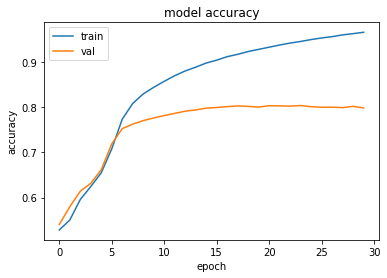

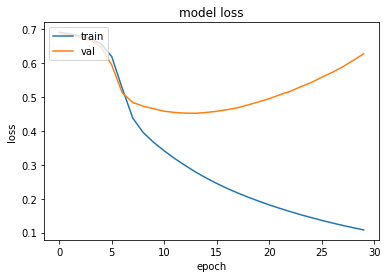

In [15]:
plot_results(training_results)

In [18]:
# stacked lstm with dropout
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True, dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, dropout=0.2)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
# lower learning rate
adam = tf.keras.optimizers.Adam(learning_rate=0.000008, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [21]:
training_results = model.fit(training_padded, training_labels, epochs=30, validation_data = (validation_padded, validation_labels))

Epoch 1/30
719/719 [==============================] - 31s 33ms/step - loss: 0.6922 - accuracy: 0.5443 - val_loss: 0.6908 - val_accuracy: 0.5427
Epoch 2/30
719/719 [==============================] - 24s 33ms/step - loss: 0.6889 - accuracy: 0.5458 - val_loss: 0.6858 - val_accuracy: 0.5639
Epoch 3/30
719/719 [==============================] - 23s 32ms/step - loss: 0.6822 - accuracy: 0.5877 - val_loss: 0.6769 - val_accuracy: 0.6121
Epoch 4/30
719/719 [==============================] - 24s 34ms/step - loss: 0.6696 - accuracy: 0.6292 - val_loss: 0.6596 - val_accuracy: 0.6433
Epoch 5/30
719/719 [==============================] - 23s 32ms/step - loss: 0.6376 - accuracy: 0.6789 - val_loss: 0.6132 - val_accuracy: 0.6821
Epoch 6/30
719/719 [==============================] - 24s 33ms/step - loss: 0.5580 - accuracy: 0.7338 - val_loss: 0.5397 - val_accuracy: 0.7236
Epoch 7/30
719/719 [==============================] - 25s 34ms/step - loss: 0.4878 - accuracy: 0.7682 - val_loss: 0.5103 - val_accuracy:

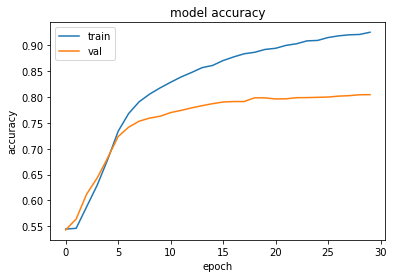

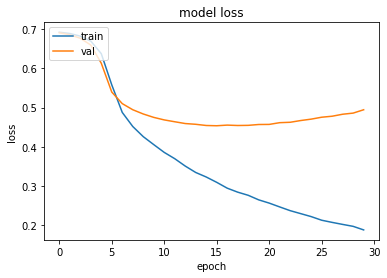

In [22]:
plot_results(training_results)